In [133]:
import pandas as pd

In [134]:
df=pd.read_excel("/content/SA - Data for Task 1.xlsx")
df[:5]

,VIN,TRANSACTION_ID,CORRECTION_VERBATIM,CUSTOMER_VERBATIM,REPAIR_DATE,CAUSAL_PART_NM,GLOBAL_LABOR_CODE_DESCRIPTION,PLATFORM,BODY_STYLE,VPPC,...,TRANSMISSION_TRACE_NBR,SRC_TXN_ID,SRC_VER_NBR,TRANSACTION_CNTR,MEDIA_FLAG,VIN_MODL_DESGTR,LINE_SERIES,LAST_KNOWN_DELVRY_TYPE_CD,NON_CAUSAL_PART_QTY,SALES_REGION_CODE
0,3HCFDDE89SH220903,13021,REPLACED STEERING WHEEL NOW OKAY,STEERING WHEEL COMING APART,2024-01-02,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCF,...,S2210121CNJX0941,2808908219,6,1,N,CF10543,1500,21.0,0,1
1,1HRFFEE8XSZ230636,13028,CHECKED - FOUND DTC'S U0229 - U1530 SET IN BCM...,CUSTOMER STATES HEATED STEERING WHEEL INOP,2024-01-03,MODULE ASM-STRG WHL HT CONT,Heated Steering Wheel Module Replacement,Full-Size Trucks,Crew Cab,T1CGF,...,R2210881CNJX0287,2808841910,6,1,Y,TF10543,1500,10.0,0,1
2,1HYKSMRK6SZ000990,13035,APPROVED 4.9(OLH) FOR ADDED DIAGNOSTICS WITH T...,OWNER REPORTS: THE SUPER CRUISE BAR ON THE STE...,2024-01-04,WHEEL ASM-STRG *BACKEN BLACKK,Steering Wheel Replacement,BEV,4 Door Utility,L233-LSOP,...,NaN,2809979441,4,1,Y,6MB26,Lux-1,10.0,0,1
3,3HCFDFEL3SH241701,13021,STEERING WHEEL REPLACEMENT,CUSTOMER STATES THE LETTERING AND FINISH ON TH...,2024-01-04,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCF,...,S1210822CKJX0291,2808892288,6,1,Y,CF10543,1500,10.0,0,1
4,1HRFFHEL1RZ181474,13021,REPLACED STEERING MESSAGE NO LONGER DISPLAYED,C/S: CUSTOMER STATES THE SERVICE DRIVER ASSIST...,2024-01-05,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CGF,...,R2212982CKJX0282,2808901882,8,1,N,TF10543,1500,10.0,0,1


### **Column-Wise Overview**

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 52 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   VIN                            100 non-null    object        
 1   TRANSACTION_ID                 100 non-null    int64         
 2   CORRECTION_VERBATIM            100 non-null    object        
 3   CUSTOMER_VERBATIM              100 non-null    object        
 4   REPAIR_DATE                    100 non-null    datetime64[ns]
 5   CAUSAL_PART_NM                 95 non-null     object        
 6   GLOBAL_LABOR_CODE_DESCRIPTION  100 non-null    object        
 7   PLATFORM                       100 non-null    object        
 8   BODY_STYLE                     100 non-null    object        
 9   VPPC                           100 non-null    object        
 10  PLANT                          99 non-null     object        
 11  BUILD_COUNTRY       

In [136]:
#numerical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
print(len(num_cols))
num_cols


18


Index(['TRANSACTION_ID', 'DEALER_REGION', 'REPAIR_AGE', 'KM',
       'COMPLAINT_CD_CSI', 'ORD_SELLING_SRC_CD', 'GLOBAL_LABOR_CODE',
       'CAMPAIGN_NBR', 'REPORTING_COST', 'TOTALCOST', 'LBRCOST',
       'TRANSMISSION_SOURCE_PLANT', 'SRC_TXN_ID', 'SRC_VER_NBR',
       'TRANSACTION_CNTR', 'LAST_KNOWN_DELVRY_TYPE_CD', 'NON_CAUSAL_PART_QTY',
       'SALES_REGION_CODE'],
      dtype='object')

In [137]:
obj_cols = df.select_dtypes(include='object').columns
print(len(obj_cols))
obj_cols

33


Index(['VIN', 'CORRECTION_VERBATIM', 'CUSTOMER_VERBATIM', 'CAUSAL_PART_NM',
       'GLOBAL_LABOR_CODE_DESCRIPTION', 'PLATFORM', 'BODY_STYLE', 'VPPC',
       'PLANT', 'BUILD_COUNTRY', 'LAST_KNOWN_DLR_NAME', 'LAST_KNOWN_DLR_CITY',
       'REPAIRING_DEALER_CODE', 'DEALER_NAME', 'REPAIR_DLR_CITY', 'STATE',
       'REPAIR_DLR_POSTAL_CD', 'COMPLAINT_CD', 'VEH_TEST_GRP',
       'COUNTRY_SALE_ISO', 'OPTN_FAMLY_CERTIFICATION',
       'OPTF_FAMLY_EMISSIOF_SYSTEM', 'TRANSACTION_CATEGORY', 'ENGINE',
       'ENGINE_DESC', 'TRANSMISSION', 'TRANSMISSION_DESC',
       'ENGINE_SOURCE_PLANT', 'ENGINE_TRACE_NBR', 'TRANSMISSION_TRACE_NBR',
       'MEDIA_FLAG', 'VIN_MODL_DESGTR', 'LINE_SERIES'],
      dtype='object')

In [138]:
# Summary statistics
df.describe(include="all")

,VIN,TRANSACTION_ID,CORRECTION_VERBATIM,CUSTOMER_VERBATIM,REPAIR_DATE,CAUSAL_PART_NM,GLOBAL_LABOR_CODE_DESCRIPTION,PLATFORM,BODY_STYLE,VPPC,...,TRANSMISSION_TRACE_NBR,SRC_TXN_ID,SRC_VER_NBR,TRANSACTION_CNTR,MEDIA_FLAG,VIN_MODL_DESGTR,LINE_SERIES,LAST_KNOWN_DELVRY_TYPE_CD,NON_CAUSAL_PART_QTY,SALES_REGION_CODE
count,100,100.000000,100,100,100,95,100,100,100,100,...,88,1.000000e+02,100.000000,100.0,100,100,99.0,98.000000,100.000000,100.00000
unique,98,NaN,93,100,NaN,18,4,11,6,26,...,88,NaN,NaN,NaN,2,41,22.0,NaN,NaN,NaN
top,3HRS9EED0LH255650,NaN,REPLACED STEERING WHEEL,STEERING WHEEL COMING APART,NaN,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCF,...,S2210121CNJX0941,NaN,NaN,NaN,N,CF10543,1500.0,NaN,NaN,NaN
freq,2,NaN,3,1,NaN,45,78,52,50,20,...,1,NaN,NaN,NaN,62,15,52.0,NaN,NaN,NaN
mean,NaN,13036.900000,NaN,NaN,2024-01-22 07:26:24,NaN,NaN,NaN,NaN,NaN,...,NaN,2.815767e+09,5.720000,1.0,NaN,NaN,NaN,14.132653,0.070000,1.09000
min,NaN,13021.000000,NaN,NaN,2024-01-02 00:00:00,NaN,NaN,NaN,NaN,NaN,...,NaN,2.808842e+09,2.000000,1.0,NaN,NaN,NaN,10.000000,0.000000,1.00000
25%,NaN,13027.750000,NaN,NaN,2024-01-12 00:00:00,NaN,NaN,NaN,NaN,NaN,...,NaN,2.809436e+09,4.000000,1.0,NaN,NaN,NaN,10.000000,0.000000,1.00000
50%,NaN,13036.000000,NaN,NaN,2024-01-24 12:00:00,NaN,NaN,NaN,NaN,NaN,...,NaN,2.820097e+09,4.000000,1.0,NaN,NaN,NaN,10.000000,0.000000,1.00000
75%,NaN,13041.250000,NaN,NaN,2024-02-01 00:00:00,NaN,NaN,NaN,NaN,NaN,...,NaN,2.820880e+09,6.000000,1.0,NaN,NaN,NaN,16.000000,0.000000,1.00000
max,NaN,13081.000000,NaN,NaN,2024-02-07 00:00:00,NaN,NaN,NaN,NaN,NaN,...,NaN,2.823000e+09,26.000000,1.0,NaN,NaN,NaN,37.000000,1.000000,4.00000


In [139]:
# Unique values per column
unique_counts = df.nunique()
print(unique_counts)

VIN                               98
TRANSACTION_ID                    32
CORRECTION_VERBATIM               93
CUSTOMER_VERBATIM                100
REPAIR_DATE                       29
CAUSAL_PART_NM                    18
GLOBAL_LABOR_CODE_DESCRIPTION      4
PLATFORM                          11
BODY_STYLE                         6
VPPC                              26
PLANT                             11
BUILD_COUNTRY                      3
LAST_KNOWN_DLR_NAME              100
LAST_KNOWN_DLR_CITY               94
REPAIRING_DEALER_CODE             95
DEALER_NAME                      100
REPAIR_DLR_CITY                   93
STATE                             39
DEALER_REGION                      2
REPAIR_DLR_POSTAL_CD              92
REPAIR_AGE                        35
KM                               100
COMPLAINT_CD_CSI                   1
COMPLAINT_CD                       7
VEH_TEST_GRP                      23
COUNTRY_SALE_ISO                   6
ORD_SELLING_SRC_CD                 7
O

# **Data Cleaning**

**a. Handling Missing or Invalid Values**

In [140]:
#columns where null values present
null_counts = df.isnull().sum()
null_counts[null_counts > 0]


,0
CAUSAL_PART_NM,5
PLANT,1
STATE,2
REPAIR_DLR_POSTAL_CD,2
VEH_TEST_GRP,2
OPTN_FAMLY_CERTIFICATION,10
OPTF_FAMLY_EMISSIOF_SYSTEM,5
CAMPAIGN_NBR,100
ENGINE_SOURCE_PLANT,12
ENGINE_TRACE_NBR,12


In [141]:
# CAMPAIGN_NBR   completely null
# Drop fully missing column
df.drop(columns=['CAMPAIGN_NBR'], inplace=True)

In [142]:
# Categorical imputation
cat_cols = ['CAUSAL_PART_NM', 'STATE', 'VEH_TEST_GRP', 'LINE_SERIES']

for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


In [143]:
# Engine & transmission trace fields
trace_cols = [
    'ENGINE_SOURCE_PLANT', 'ENGINE_TRACE_NBR',
    'TRANSMISSION_SOURCE_PLANT', 'TRANSMISSION_TRACE_NBR'
]
df[trace_cols] = df[trace_cols].fillna('Unknown')

In [144]:
#columns where null values present
null_counts = df.isnull().sum()
null_counts[null_counts > 0]


,0
PLANT,1
REPAIR_DLR_POSTAL_CD,2
OPTN_FAMLY_CERTIFICATION,10
OPTF_FAMLY_EMISSIOF_SYSTEM,5
LAST_KNOWN_DELVRY_TYPE_CD,2


In [145]:
df.shape

(100, 51)

In [146]:
df.shape

(100, 51)

In [147]:
high_missing_cols = [
    'REPAIR_DLR_POSTAL_CD',
    'LINE_SERIES',
    'ENGINE_SOURCE_PLANT',
    'TRANSMISSION_SOURCE_PLANT',
    'OPTN_FAMLY_CERTIFICATION',
    'OPTF_FAMLY_EMISSIOF_SYSTEM'
]

df[high_missing_cols] = df[high_missing_cols].fillna('UNKNOWN')

In [148]:
#columns where null values present
null_counts = df.isnull().sum()
null_counts[null_counts > 0]

,0
PLANT,1
LAST_KNOWN_DELVRY_TYPE_CD,2


In [149]:
cat_cols = [
    'CAUSAL_PART_NM',          # 5%
    'STATE',                   # 2%
    'VEH_TEST_GRP',             # 2%
    'PLANT',                    # 1%
    'ENGINE_TRACE_NBR',         # 5%
    'LAST_KNOWN_DELVRY_TYPE_CD' # 2% (code-based but low missing)
]

for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [150]:
#columns where null values present
null_counts = df.isnull().sum()
null_counts[null_counts > 0]

,0


In [170]:
#Fill missing descriptions using their corresponding base columns
df['ENGINE_DESC'] = df['ENGINE_DESC'].fillna(df['ENGINE'])
df['TRANSMISSION_DESC'] = df['TRANSMISSION_DESC'].fillna(df['TRANSMISSION'])
df['ENGINE_SOURCE_PLANT'] = df['ENGINE_SOURCE_PLANT'].fillna('UNKNOWN')
df['ENGINE_TRACE_NBR'] = df['ENGINE_TRACE_NBR'].fillna('UNKNOWN')
df['TRANSMISSION_SOURCE_PLANT'] = df['TRANSMISSION_SOURCE_PLANT'].fillna('UNKNOWN')
df['LINE_SERIES'] = df['LINE_SERIES'].fillna('UNKNOWN')
df['REPAIR_DLR_POSTAL_CD'] = df['REPAIR_DLR_POSTAL_CD'].fillna('UNKNOWN')



In [152]:
null_counts = df.isnull().sum()
null_counts[null_counts > 0]

,0


**Handling Categorical Inconsistencies:**

Case inconsistency

Extra spaces

Standardizes categories

In [153]:
cat_columns = df.select_dtypes(include='object').columns

for col in cat_columns:
    df[col] = df[col].str.strip().str.upper()

In [154]:
import numpy as np

df.replace(
    ['', ' ', 'NULL', 'N/A', 'NA', 'NONE'],
    np.nan,
    inplace=True
)


**c. Numerical Validation & Outlier Handling**

In [155]:
#Ensure Numeric Format
num_cols = ['KM', 'REPAIR_AGE', 'TOTALCOST', 'LBRCOST', 'REPORTING_COST']
df[num_cols] = df[num_cols].apply(pd.to_numeric, errors='coerce')


# Identifying Critical Columns:

In [156]:
#top 5 critical columns that might be most insightful for stakeholders according to your data understanding

TOTALCOST

REPAIR_AGE

KM

CAUSAL_PART_NM

DEALER_REGION


In [157]:
# reasoning

1️ TOTALCOST

Represents total financial impact of repairs

Primary KPI for warranty cost control

Used by finance & operations teams

2️ REPAIR_AGE

Measures how early failures occur

Helps identify manufacturing or design issues

Critical for product reliability analysis

3️ KM

Shows relationship between vehicle usage and failures

Helps distinguish early defects vs wear-and-tear

Useful for predictive maintenance strategies

4️ CAUSAL_PART_NM

Identifies which component caused the repair

Enables root cause and supplier quality analysis

Important for recall and corrective actions

5️ DEALER_REGION

Allows geographical comparison

Helps identify high-cost or high-failure regions

Supports dealer performance evaluation

In [158]:
#c. Visualizations

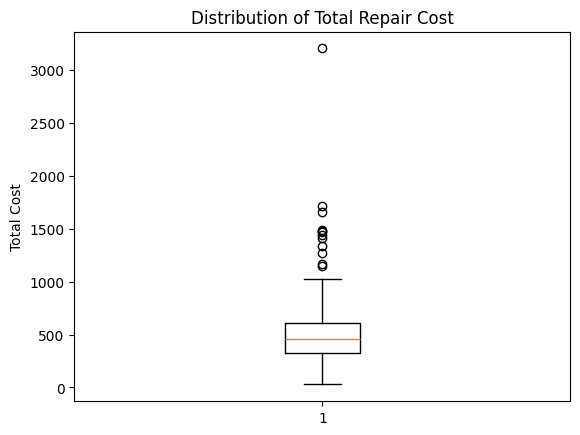

In [159]:
import matplotlib.pyplot as plt

plt.figure()
plt.boxplot(df['TOTALCOST'])
plt.title('Distribution of Total Repair Cost')
plt.ylabel('Total Cost')
plt.show()


Insight:

Identifies cost variability and extreme warranty cases.

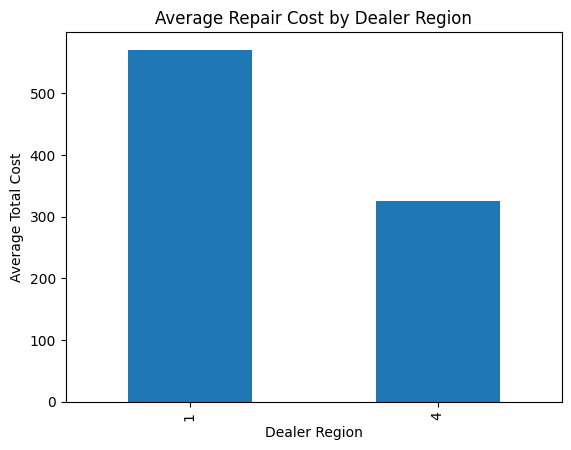

In [160]:
avg_cost_region = df.groupby('DEALER_REGION')['TOTALCOST'].mean()

plt.figure()
avg_cost_region.plot(kind='bar')
plt.title('Average Repair Cost by Dealer Region')
plt.xlabel('Dealer Region')
plt.ylabel('Average Total Cost')
plt.show()


Insight:

Highlights regions with disproportionately high warranty costs.

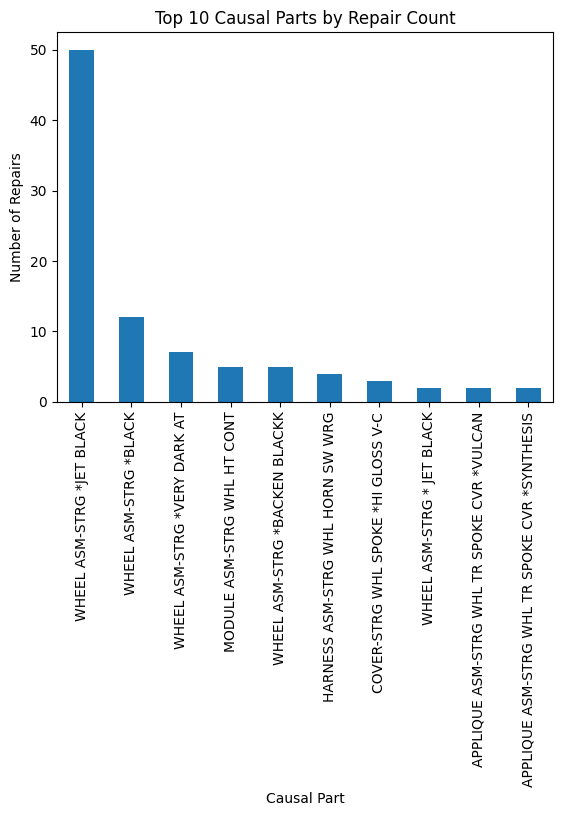

In [161]:
top_parts = df['CAUSAL_PART_NM'].value_counts().head(10)

plt.figure()
top_parts.plot(kind='bar')
plt.title('Top 10 Causal Parts by Repair Count')
plt.xlabel('Causal Part')
plt.ylabel('Number of Repairs')
plt.show()


Insight:

Identifies components contributing most to repair incidents.

# 4.Generating tags/features from free text available

In [162]:
#cleaning
#generate tags from CORRECTION_VERBATIM feature
import re
import pandas as pd

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

df['CORRECTION_VERBATIM_CLEANED'] = df['CORRECTION_VERBATIM'].apply(clean_text)


In [163]:
repair_action_dict = {
    'replace': ['replace', 'replaced', 'replacement'],
    'inspect': ['inspect', 'inspected', 'check', 'checked']
}

component_dict = {
    'engine': 'engine',
    'motor': 'engine',
    'transmission': 'transmission',
    'gearbox': 'gearbox',
    'clutch': 'clutch',
    'steering': 'steering_wheel'
}


In [164]:
def extract_tags(text, keyword_dict):
    tags = []
    for tag, keywords in keyword_dict.items():
        for word in keywords:
            if word in text:
                tags.append(tag)
                break
    return tags

def extract_components(text, component_map):
    text = text.lower()
    components = set()

    for keyword, component in component_map.items():
        if keyword in text:
            components.add(component)

    return list(components)


In [165]:
df['REPAIR_ACTION_TAGS'] = df['CORRECTION_VERBATIM_CLEANED'].apply(
    lambda x: extract_tags(x, repair_action_dict)
)
df['COMPONENT_TAGS'] = df['CORRECTION_VERBATIM_CLEANED'].apply(
    lambda x: extract_components(x, component_dict)
)


In [166]:
df['REPAIR_ACTION_TAGS'] = df['REPAIR_ACTION_TAGS'].apply(
    lambda x: ', '.join(x) if isinstance(x, list) else ''
)

df['COMPONENT_TAGS'] = df['COMPONENT_TAGS'].apply(
    lambda x: ', '.join(x) if isinstance(x, list) else ''
)

In [167]:
df['REPAIR_ACTION_TAGS'] = df['REPAIR_ACTION_TAGS'].replace('', 'None')
df['COMPONENT_TAGS'] = df['COMPONENT_TAGS'].replace('', 'None')

df['REPAIR_ACTION_TAGS'].unique()
df['COMPONENT_TAGS'].unique()


array(['steering_wheel', 'None', 'engine, steering_wheel'], dtype=object)

In [168]:
df[:5]

,VIN,TRANSACTION_ID,CORRECTION_VERBATIM,CUSTOMER_VERBATIM,REPAIR_DATE,CAUSAL_PART_NM,GLOBAL_LABOR_CODE_DESCRIPTION,PLATFORM,BODY_STYLE,VPPC,...,TRANSACTION_CNTR,MEDIA_FLAG,VIN_MODL_DESGTR,LINE_SERIES,LAST_KNOWN_DELVRY_TYPE_CD,NON_CAUSAL_PART_QTY,SALES_REGION_CODE,CORRECTION_VERBATIM_CLEANED,REPAIR_ACTION_TAGS,COMPONENT_TAGS
0,3HCFDDE89SH220903,13021,REPLACED STEERING WHEEL NOW OKAY,STEERING WHEEL COMING APART,2024-01-02,WHEEL ASM-STRG *JET BLACK,STEERING WHEEL REPLACEMENT,FULL-SIZE TRUCKS,CREW CAB,T1CCF,...,1,N,CF10543,NaN,21.0,0,1,replaced steering wheel now okay,replace,steering_wheel
1,1HRFFEE8XSZ230636,13028,CHECKED - FOUND DTC'S U0229 - U1530 SET IN BCM...,CUSTOMER STATES HEATED STEERING WHEEL INOP,2024-01-03,MODULE ASM-STRG WHL HT CONT,HEATED STEERING WHEEL MODULE REPLACEMENT,FULL-SIZE TRUCKS,CREW CAB,T1CGF,...,1,Y,TF10543,NaN,10.0,0,1,checked found dtc s u u set in bcm found pip j...,"replace, inspect",None
2,1HYKSMRK6SZ000990,13035,APPROVED 4.9(OLH) FOR ADDED DIAGNOSTICS WITH T...,OWNER REPORTS: THE SUPER CRUISE BAR ON THE STE...,2024-01-04,WHEEL ASM-STRG *BACKEN BLACKK,STEERING WHEEL REPLACEMENT,BEV,4 DOOR UTILITY,L233-LSOP,...,1,Y,6MB26,LUX-1,10.0,0,1,approved olh for added diagnostics with tcsc t...,"replace, inspect","engine, steering_wheel"
3,3HCFDFEL3SH241701,13021,STEERING WHEEL REPLACEMENT,CUSTOMER STATES THE LETTERING AND FINISH ON TH...,2024-01-04,WHEEL ASM-STRG *JET BLACK,STEERING WHEEL REPLACEMENT,FULL-SIZE TRUCKS,CREW CAB,T1CCF,...,1,Y,CF10543,NaN,10.0,0,1,steering wheel replacement,replace,steering_wheel
4,1HRFFHEL1RZ181474,13021,REPLACED STEERING MESSAGE NO LONGER DISPLAYED,C/S: CUSTOMER STATES THE SERVICE DRIVER ASSIST...,2024-01-05,WHEEL ASM-STRG *JET BLACK,STEERING WHEEL REPLACEMENT,FULL-SIZE TRUCKS,CREW CAB,T1CGF,...,1,N,TF10543,NaN,10.0,0,1,replaced steering message no longer displayed,replace,steering_wheel


In [178]:
df.isna().sum()

,0
VIN,0
TRANSACTION_ID,0
CORRECTION_VERBATIM,0
CUSTOMER_VERBATIM,0
REPAIR_DATE,0
CAUSAL_PART_NM,0
GLOBAL_LABOR_CODE_DESCRIPTION,0
PLATFORM,0
BODY_STYLE,0
VPPC,0


In [179]:
def fix_text(text):
    if isinstance(text, str):
        return (
            text.encode('latin1', errors='ignore')
                .decode('utf-8', errors='ignore')
        )
    return text

df['CUSTOMER_VERBATIM'] = df['CUSTOMER_VERBATIM'].apply(fix_text)
df['CORRECTION_VERBATIM'] = df['CORRECTION_VERBATIM'].apply(fix_text)


In [177]:
df.to_csv(
    "Task1_Cleaned_and_Tagged_Data.csv",
    index=False,
    encoding="utf-8-sig"
)
